In [5]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from urllib.request import urlopen

The following function get_images() returns the dataset of 10 images as a list of images.

In [6]:
# do not modify the following code
def get_images():
  num_im = 10
  ims = []
  for i in range(num_im):
    url = 'https://raw.githubusercontent.com/guptashvm/Data/master/data/%02d.png'%(i)
    with urlopen(url) as file:
      im = mpimg.imread(file)
      ims.append(im)
  return ims

In this problem we will work on image compression using SVD. The basic concept is to represent an image with size $m \times n$ as a two-dimentional $m \times n$ matrix. SVD is then applied to this matrix to obtain the U, S, and V matrices. S is a diagonal $m \times n$ matrix whose number of non-zero elements on the diagonal determines the rank of the original matrix. Then we can use a smaller number of rank to approximate the original image. For example, you can keep the biggest $k$ singular values and set all the others to 0. 
    
We provide 10 images in the dataset. Try $k=1, 2, \dots, 30$ to reconstruct the original images and plot the error averaged on all the images. You can measure the reconstruction error by mean L1 error. It is defined as:

$$error_{l_1} = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}||reconstruction(i,j)-original(i,j)||_1$$

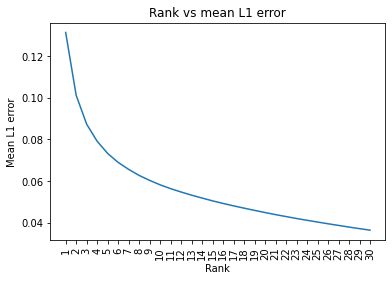

The errors for each of the ranks are as follows:
1 -> 0.131
2 -> 0.101
3 -> 0.087
4 -> 0.079
5 -> 0.073
6 -> 0.069
7 -> 0.066
8 -> 0.063
9 -> 0.060
10 -> 0.058
11 -> 0.056
12 -> 0.055
13 -> 0.053
14 -> 0.052
15 -> 0.050
16 -> 0.049
17 -> 0.048
18 -> 0.047
19 -> 0.046
20 -> 0.045
21 -> 0.044
22 -> 0.043
23 -> 0.042
24 -> 0.041
25 -> 0.040
26 -> 0.039
27 -> 0.039
28 -> 0.038
29 -> 0.037
30 -> 0.036


In [7]:
'''
The images are grayscale and the values of R, G, B are the same for any pixel
within any image. The alpha value is 1.0 for all the pixels. Running SVD using
the alpha value makes no sense. Hence, we run SVD just using one of R, G, B values
(in our case, R) by converting the image to 2d and getting rid of the other 2
color values and the alpha value. Finally, when the image is made from the
reconstruction, we assign the same value we got for that color(R) to the other 
2 colors(G, B) and set alpha = 1.0
'''
def convert_to_2d(images):
  for i in range(len(images)):
    images[i] = images[i][:,:,0]
    
def get_svds(images):
  return [(svd(image)) for image in images]

def get_reconstructions(svds, k):
  reconstructions = []
  for U, s, Vt in svds:
    U, S, Vt = U[:,:k], np.diag(s[:k]), Vt[:k,:]
    reconstruction = np.matmul(U, np.matmul(S, Vt))
    reconstructions.append(reconstruction)
  return reconstructions

def l1_error(a, b):
  return np.mean(np.abs(a - b))

def average_l1_error(originals, reconstructions):
  return np.mean([l1_error(o, r) for o, r in zip(originals, reconstructions)])

def get_errors(images, all_k_reconstructions):
  return [average_l1_error(images, recs) for recs in all_k_reconstructions]
  
def plot(k_values, errors):
  plt.xlabel("Rank")
  plt.ylabel("Mean L1 error")
  plt.xticks(k_values, rotation="vertical")
  plt.title("Rank vs mean L1 error")
  plt.plot(k_values, errors)
  plt.show()
  
def print_errors(k_values, errors):
  print("The errors for each of the ranks are as follows:")
  for k, error in zip(k_values, errors):
    print("{0} -> {1:.3f}".format(k, error))
  
K_VALUES = list(range(1, 31))

images = get_images()
convert_to_2d(images)

svds = get_svds(images)

all_k_reconstructions = [get_reconstructions(svds, k) for k in K_VALUES]

errors = get_errors(images, all_k_reconstructions)

plot(K_VALUES, errors)

print_errors(K_VALUES, errors)

Also visualize some reconstructed images and compare them to the original **ones**. Display the first image in the dataset along with its rank $10$ approximation. Also, display the second image in the dataset along with its rank $15$ approximation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


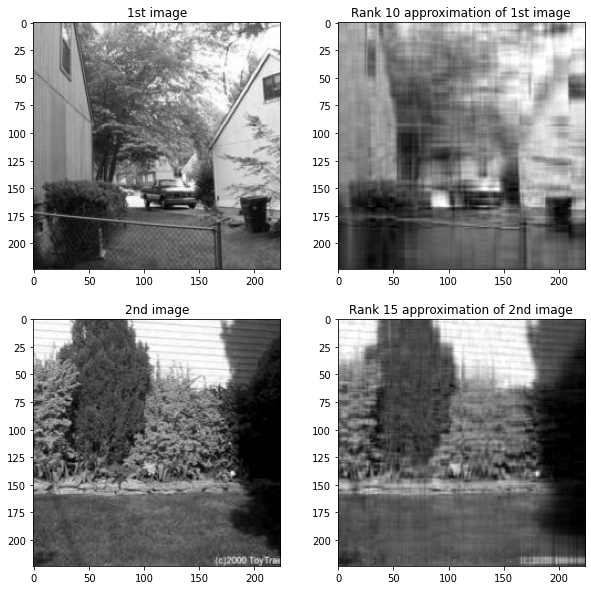

In [8]:
'''
The image is made from the reconstruction by setting alpha = 1.0 and the values 
of R, G, B to the value we got from the approximation using SVD.
'''
def make_image(reconstruction):
  image_shape = reconstruction.shape + (4,)
  image = np.ones(image_shape)
  for i in range(3):
    image[:,:,i] = reconstruction
  return image

def visualize(visualizations, titles):
  number_of_rows, number_of_columns = np.array(titles).shape
  fig, axs = plt.subplots(number_of_rows, number_of_columns)
  fig.set_figheight(10)
  fig.set_figwidth(10)
  for i in range(number_of_rows):
    for j in range(number_of_columns):
      axs[i, j].imshow(visualizations[i][j], cmap="gray")
      axs[i, j].set_title(titles[i][j])
      
visualizations = [[images[0], make_image(all_k_reconstructions[9][0])], 
                  [images[1], make_image(all_k_reconstructions[14][1])]]

titles = [["1st image", "Rank 10 approximation of 1st image"],
          ["2nd image", "Rank 15 approximation of 2nd image"]]

visualize(visualizations, titles)